In [47]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [48]:
comps = sb.competitions()
comps[comps['competition_name']=='Premier League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851
65,2,44,England,Premier League,male,False,False,2003/2004,2024-03-08T14:49:13.195793,2021-06-13T16:17:31.694,None,2024-03-08T14:49:13.195793


In [49]:
sb.matches(2,27)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [50]:
sb.events(match_id=3754058, split=True, flatten_attrs=False)['shots'].value_counts('player')

player
Jamie Vardy            4
N''Golo Kanté          4
Junior Stanislas       3
Riyad Mahrez           3
Adam Smith             2
Dan Gosling            2
Joshua King            2
José Leonardo Ulloa    2
Charlie Daniels        1
Danny Drinkwater       1
Robert Huth            1
Shinji Okazaki         1
Wes Morgan             1
Name: count, dtype: int64

In [51]:
sb.events(match_id=3754058)['type'].value_counts()

type
Pass               1002
Ball Receipt*       924
Carry               742
Pressure            363
Ball Recovery       102
Duel                 83
Clearance            59
Block                42
Goal Keeper          35
Miscontrol           34
Dribble              31
Dispossessed         29
Shot                 27
Interception         25
Dribbled Past        19
Foul Committed       19
Foul Won             18
Injury Stoppage       5
Substitution          5
Half Start            4
Half End              4
Starting XI           2
Tactical Shift        1
Shield                1
Name: count, dtype: int64

## Partidos del Leicester

In [52]:
partidos = sb.matches(2,27)
partidos_lei = partidos[(partidos['home_team']=='Leicester City')|(partidos['away_team']=='Leicester City')]

In [53]:
lei_vs_sto = sb.events(3754186)

In [54]:
lei_vs_sto.iloc[0,:]

50_50                                        NaN
ball_receipt_outcome                         NaN
ball_recovery_recovery_failure               NaN
block_deflection                             NaN
block_offensive                              NaN
                                       ...      
team                              Leicester City
team_id                                       22
timestamp                           00:00:00.000
type                                 Starting XI
under_pressure                               NaN
Name: 0, Length: 91, dtype: object

In [55]:
ids = list(partidos_lei['match_id'])

In [56]:
prueba = sb.events(match_id=3754186, split=True, flatten_attrs=False)['pressures']
prueba['counterpress'].value_counts()

counterpress
True    58
Name: count, dtype: int64

In [57]:
sb.events(match_id=3754186, split=True, flatten_attrs=False).keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'clearances', 'duels', 'dispossesseds', 'ball_recoverys', 'foul_committeds', 'foul_wons', 'dribbled_pasts', 'dribbles', 'blocks', 'goal_keepers', 'shots', 'interceptions', 'offsides', '50/50s', 'shields', 'half_ends', 'substitutions', 'injury_stoppages', 'referee_ball_drops'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


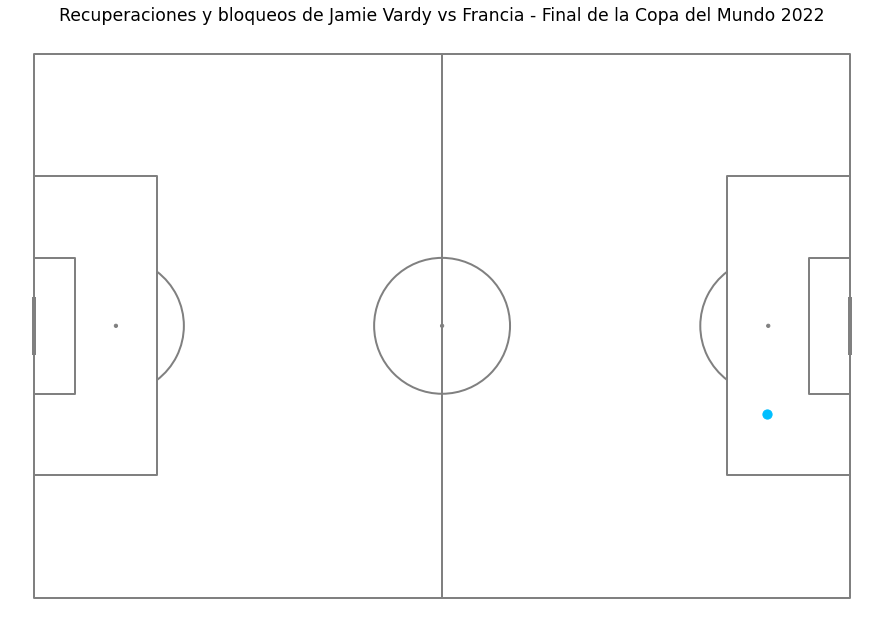

In [58]:
def shots(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    shots=lei_vs_sto[(lei_vs_sto["player"]==player)&(lei_vs_sto['type']=='Shot')]
    shots[['x', 'y']] = shots['location'].apply(pd.Series)


    #dibujando el campo de fútbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')
    pitch.scatter(x = shots['x'], y = shots['y'], ax=ax,s=shots['shot_statsbomb_xg']*600,c='deepskyblue')

# Unir los puntos para formar un polígono con un relleno sombreado
    #bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
    #bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
    #                          pitch.dim.six_yard_top, pitch.dim.top]))
    #bin_statistic = pitch.bin_statistic(recup.x, recup.y, statistic='count', bins=(4,3), normalize=True)
    #pitch.heatmap(bin_statistic, ax=ax, cmap='Blues', edgecolor='#f9f9f9')
    #labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
     #                             ax=ax, ha='center', va='center',
      #                            str_format='{:.0%}')
    
    ax_title = ax.set_title('Recuperaciones y bloqueos de ' f'{player} vs Francia - Final de la Copa del Mundo 2022', fontsize=17.3,color='black')
    #etiquetas de color
    plt.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.06, 0.49, 0.5),markerscale=0.5)    
    plt.show()
shots('Jamie Vardy')

## Dataset con los tiros

In [59]:
# me hago una lista con los id de cada partido del Leicester
ids = list(partidos_lei['match_id'])
ids = ids[1:]

In [60]:
sb.events(3754058)[['type','player']]

,type,player
0,Starting XI,NaN
1,Starting XI,NaN
2,Half Start,NaN
3,Half Start,NaN
4,Half Start,NaN
...,...,...
3571,Injury Stoppage,Danny Drinkwater
3572,Injury Stoppage,Glenn Murray
3573,Injury Stoppage,Danny Drinkwater
3574,Tactical Shift,NaN


In [61]:
eventos = [sb.events(3754058)]

# Agregar eventos de los demás partidos
for i in ids:
    eventos.append(sb.events(i))

# Concatenar todos los eventos en un solo DataFrame
p0 = pd.concat(eventos, ignore_index=True)

In [62]:
p0[['x', 'y']] = p0['location'].apply(pd.Series)
tiros=p0[(p0["player"]=='Jamie Vardy')&(p0['type']=='Shot')]
tiros=tiros[['x','y','shot_type','shot_technique','shot_outcome','shot_statsbomb_xg']]
tiros

,x,y,shot_type,shot_technique,shot_outcome,shot_statsbomb_xg
3154,111.3,38.7,Open Play,Normal,Post,0.575428
3158,114.2,27.2,Open Play,Normal,Wayward,0.111973
3159,100.4,33.3,Open Play,Normal,Saved,0.094897
3171,116.3,53.9,Open Play,Normal,Off T,0.012095
6864,109.0,38.7,Open Play,Volley,Wayward,0.064528
...,...,...,...,...,...,...
123382,113.6,29.9,Open Play,Normal,Wayward,0.071107
123385,107.7,51.0,Open Play,Normal,Off T,0.158586
126852,108.4,32.9,Open Play,Half Volley,Saved,0.057609
126860,115.6,51.3,Open Play,Normal,Goal,0.280527


In [63]:
def clasificar_tiro(x):
    if x['shot_outcome']=='Goal':
        return 'Goal'
    elif x['shot_outcome'] in ['Saved','Post']:
        return 'On Target'
    else:
        return 'Off Target/Blocked'

In [64]:
tiros['outcome']=tiros.apply(clasificar_tiro,axis=1)
tiros

,x,y,shot_type,shot_technique,shot_outcome,shot_statsbomb_xg,outcome
3154,111.3,38.7,Open Play,Normal,Post,0.575428,On Target
3158,114.2,27.2,Open Play,Normal,Wayward,0.111973,Off Target/Blocked
3159,100.4,33.3,Open Play,Normal,Saved,0.094897,On Target
3171,116.3,53.9,Open Play,Normal,Off T,0.012095,Off Target/Blocked
6864,109.0,38.7,Open Play,Volley,Wayward,0.064528,Off Target/Blocked
...,...,...,...,...,...,...,...
123382,113.6,29.9,Open Play,Normal,Wayward,0.071107,Off Target/Blocked
123385,107.7,51.0,Open Play,Normal,Off T,0.158586,Off Target/Blocked
126852,108.4,32.9,Open Play,Half Volley,Saved,0.057609,On Target
126860,115.6,51.3,Open Play,Normal,Goal,0.280527,Goal


In [65]:
tiros['shot_outcome'].value_counts()

shot_outcome
Off T      30
Saved      27
Blocked    26
Goal       24
Wayward     6
Post        5
Name: count, dtype: int64

In [66]:
tiros['outcome'].value_counts()

outcome
Off Target/Blocked    62
On Target             32
Goal                  24
Name: count, dtype: int64

## Mapa de tiros

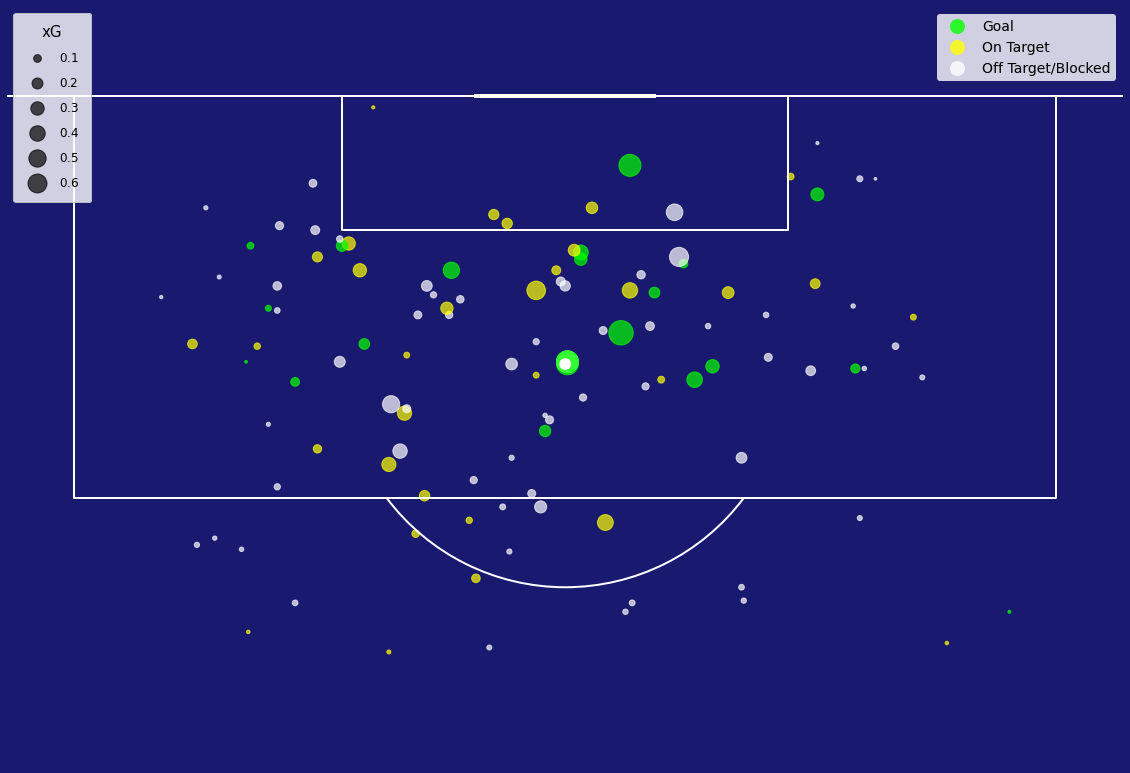

In [67]:
colors = {'Goal':'lime','On Target':'yellow','Off Target/Blocked':'white'}
colors1 = [colors[conf] if conf in colors else 'grey' for conf in tiros['outcome']]
from matplotlib import pyplot


def shots(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado


    #dibujando el campo de fútbol
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='midnightblue', line_color='white',line_zorder=2,half=True,
                         pad_bottom=-30,
                         pad_left=-15,
                         pad_right=-15)

    fig, ax = pitch.draw(figsize=(20, 14), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('midnightblue')
    ps = pitch.scatter(x = tiros['x'], y = tiros['y'], ax=ax,s=tiros['shot_statsbomb_xg']*600,c=colors1,alpha=0.7)

    #ax_title = ax.set_title('Tiros de ' f'{player} durante la Premier League 2015/16', fontsize=17.3,color='black')
    
    kw = dict(prop="sizes", num=[0,0.1,0.2,0.3,0.4,0.5,0.6],func=lambda s: s/600)
    legend2 = ax.legend(*ps.legend_elements(**kw),
                        loc="upper left", title="xG",borderpad=1,labelspacing=1,fontsize=12,title_fontsize=15)
    
    legend_labels = {conf: plt.Line2D([0], [0], marker='o', color='None', markerfacecolor=color, markersize=15, 
                                      label=conf,alpha=0.8,markeredgecolor='None')
                     for conf, color in colors.items()}
    plt.legend(handles=legend_labels.values(),loc='upper right',
             prop={'size': 14},edgecolor='None')
    pyplot.gca().add_artist(legend2)
    #ax_title = ax.set_title('Tiros de ' f'{player} - Premier League 2015/16', fontsize=23,color='white')
    plt.show()
shots('Jamie Vardy')

A completar de esta sección:
- comparación con otros delanteros de la premier en % de tiros que fueron al arco
- comparación en % de tiros que fueron gol
- idem pero adentro del área
- minutos por gol y minutos por g+a

In [68]:
vardy = p0[p0['player']=='Jamie Vardy']
vardy

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,shot_deflected,goalkeeper_lost_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,block_save_block,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,shot_saved_to_post,x,y
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.2,37.4
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.2,53.8
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.1,36.3
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.4,51.3
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.9,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.4,16.4
126869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.6,16.4
126875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.2,26.8
126884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.1,64.7


## Pases de Vardy último tercio (generación de chances)

### Pases de Vardy al último 1/3

In [69]:
pases_vardy = vardy[vardy['type']=='Pass']
pases_vardy[['pass_end_x', 'pass_end_y']] = pases_vardy['pass_end_location'].apply(pd.Series)
completos = pases_vardy[pases_vardy['pass_outcome'].isnull()]
incompletos = pases_vardy[pases_vardy['pass_outcome'].notnull()]

In [70]:
len(pases_vardy[(pases_vardy['x']>=100)&(pases_vardy['pass_outcome'].isnull())])

72

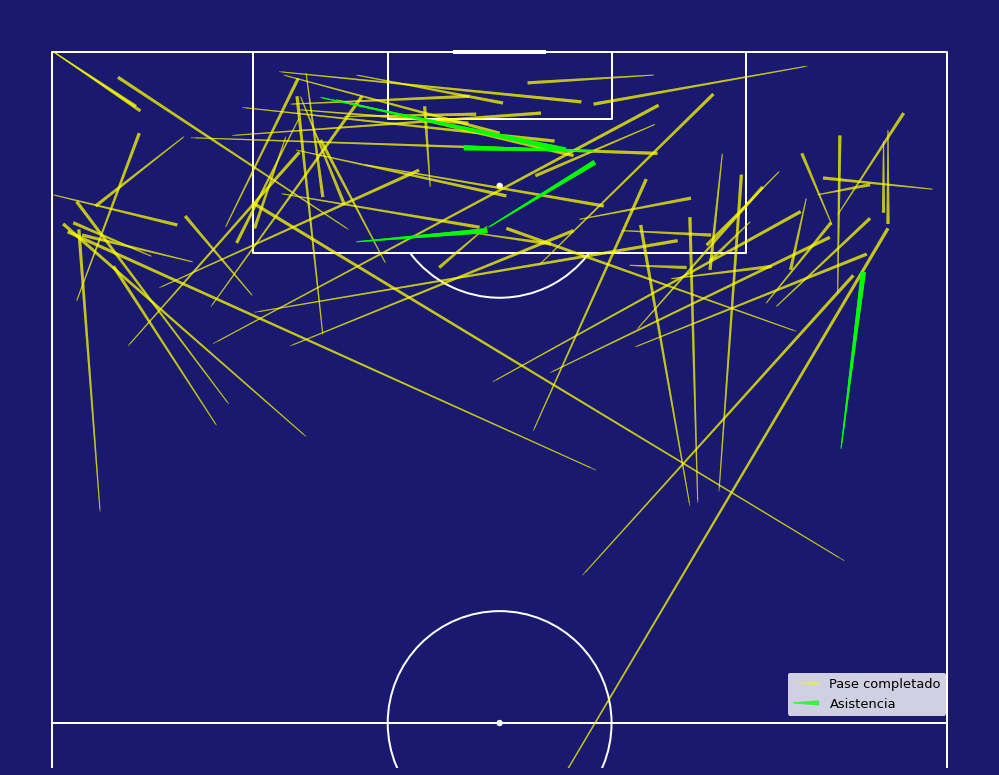

In [71]:
def passMap(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    comp=completos[(completos["player"]==player)]
    asist=completos[(completos["player"]==player)&(completos["pass_goal_assist"]==True)]
    complete_f3 = comp[(completos["pass_end_x"]>=100)&(completos["pass_goal_assist"].isna())]
    
    #dibujando el campo de fútbol
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='midnightblue', line_color='white',line_zorder=2,half=True)

    fig, ax = pitch.draw(figsize=(20, 14), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('midnightblue')

    #Contando los pases por zona y coordenadas x & y de finalizacion de los pases para el mapa de calor
    #bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    #pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap='Blues')

    #Graficando las flechas de los pases
    pitch.lines(complete_f3.x, complete_f3.y,
    complete_f3.pass_end_x, complete_f3.pass_end_y, color='yellow', ax=ax, label = "Pase completado",comet= True,
               linewidth=3.2,alpha=0.5)
    pitch.lines(asist.x, asist.y,
    asist.pass_end_x, asist.pass_end_y, color='lime', ax=ax, label = "Asistencia",comet= True)
    #etiquetas de color
    ax.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.06, 0.49, 0.5))

    #titulo
    #ax_title = ax.set_title('Pases al último 1/3 de ' f'{player} - Premier League 2015/16', fontsize=22,color='white')
    plt.show()
passMap('Jamie Vardy')

In [72]:
vardy['dribble_outcome'].value_counts()

dribble_outcome
Complete      39
Incomplete    37
Name: count, dtype: int64

In [73]:
len(vardy[(vardy['type']=='Dribble')&(vardy['x']>60)&(vardy['dribble_outcome']=='Complete')])

36

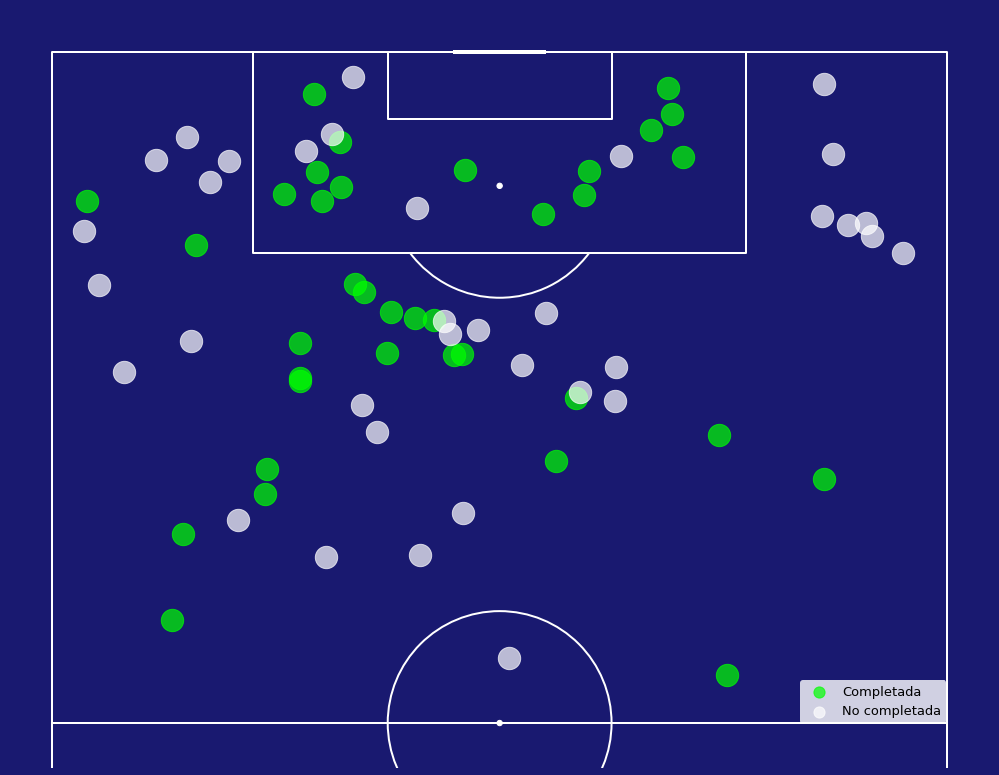

In [74]:
def drib(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    dcomp = vardy[(vardy['type']=='Dribble')&(vardy['dribble_outcome']=='Complete')&(vardy['x']>60)]
    dincomp = vardy[(vardy['type']=='Dribble')&(vardy['dribble_outcome']=='Incomplete')]

    #dibujando el campo de fútbol
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='midnightblue', line_color='white',line_zorder=2,half=True)

    fig, ax = pitch.draw(figsize=(20, 14), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('midnightblue')
    pitch.scatter(x = dcomp['x'], y = dcomp['y'], ax=ax,c='lime',alpha=0.7,s=500,label='Completada')
    pitch.scatter(x = dincomp['x'], y = dincomp['y'], ax=ax,c='white',alpha=0.7,s=500,label='No completada')
    plt.legend()
    #ax_title = ax.set_title('Tiros de ' f'{player} durante la Premier League 2015/16', fontsize=17.3,color='black')
    #ax_title = ax.set_title('Gambetas de ' f'{player} en campo rival - Premier League 2015/16', fontsize=23,color='white')
    plt.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.05, 0.49, 0.5),markerscale=0.5) 
    plt.show()
drib('Jamie Vardy')

## Mapa de presiones de vardy y del equipo

In [75]:
presion_vardy = vardy[vardy['type']=='Pressure']

In [76]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

[None, None, None, None, None, None, None, None, None, None]

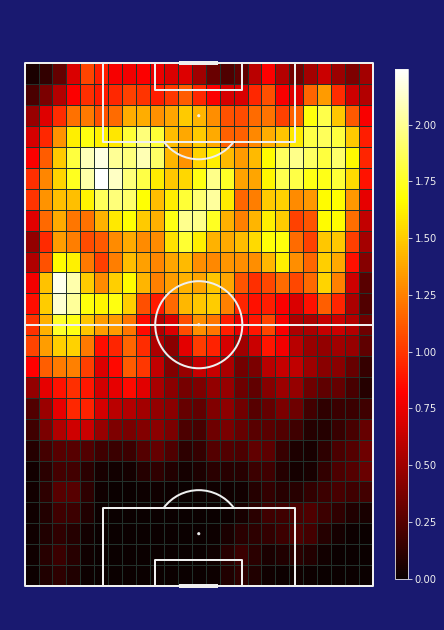

In [77]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='midnightblue', line_color='#efefef')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('midnightblue')

# plot heatmap
bin_statistic = pitch.bin_statistic(presion_vardy.x, presion_vardy.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

# endnote and title
#ax_title = axs['title'].text(0.5, 0.5, "Mapa de presiones", color='white',
#                             va='center', ha='center',fontsize=23)

## Mapa de presiones del Leicester

In [78]:
presion_lei = p0[p0['type']=='Pressure']

[None, None, None, None, None, None, None, None, None, None]

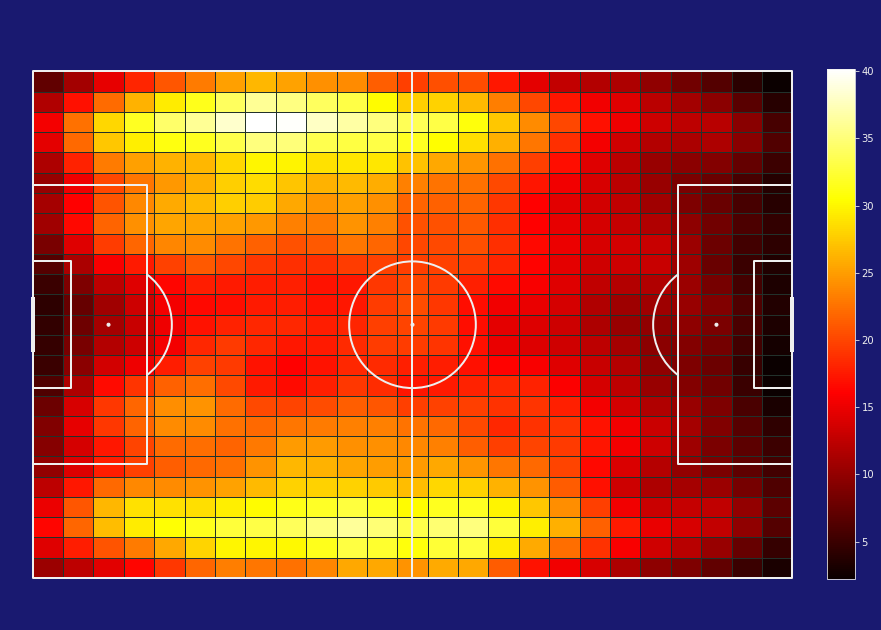

In [79]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='midnightblue', line_color='#efefef')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('midnightblue')

# plot heatmap
bin_statistic = pitch.bin_statistic(presion_lei.x, presion_lei.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

# endnote and title
#ax_title = axs['title'].text(0.5, 0.5, "Mapa de presiones del Leicester City - Premier League 2015/16", color='white',
                            # va='center', ha='center',fontsize=23)

## Recuperaciones + intercepciones

In [80]:
vardy_rec = vardy[vardy['type']=='Ball Recovery']
vardy_interc = vardy[vardy['type']=='Interception']

In [81]:
lei_vs_sto.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_shot_saved_off_target', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'p

In [82]:
len(vardy[(vardy['type']=='Ball Recovery')&(vardy['x']>80)])

55

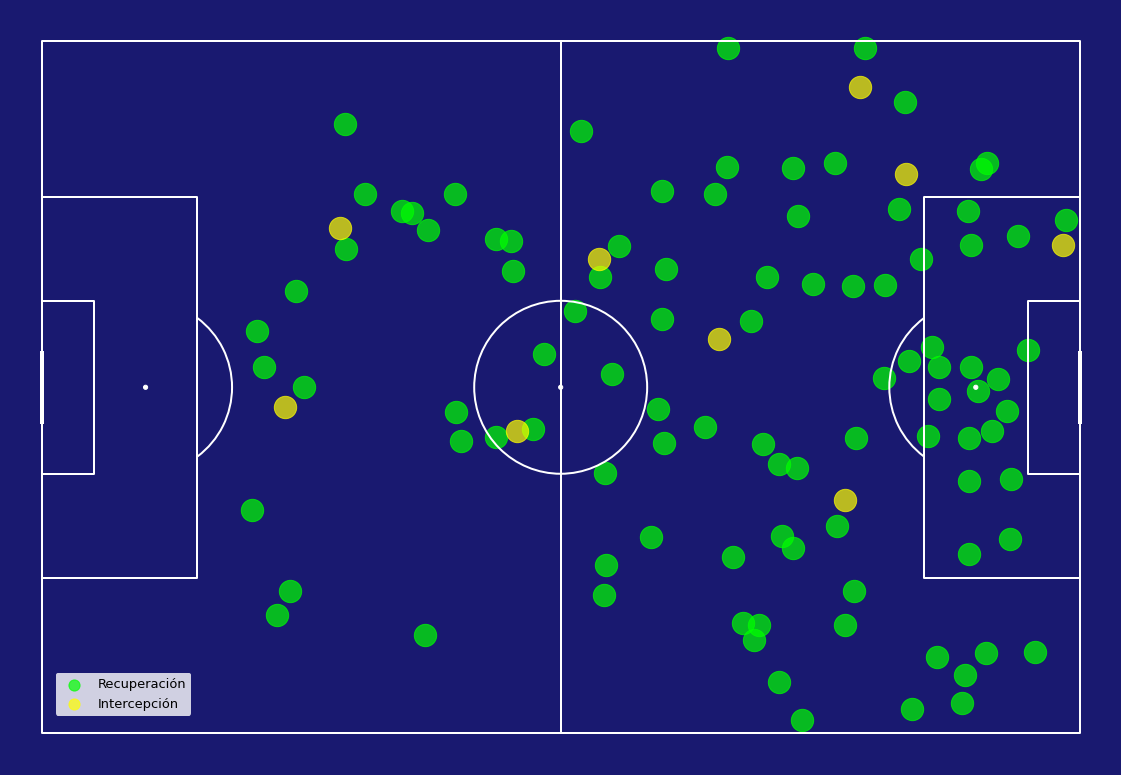

In [83]:
def rec(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    vardy_rec = vardy[vardy['type']=='Ball Recovery']
    vardy_interc = vardy[vardy['type']=='Interception']

    #dibujando el campo de fútbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='midnightblue', line_color='white',line_zorder=2)

    fig, ax = pitch.draw(figsize=(20, 14), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('midnightblue')
    pitch.scatter(x = vardy_rec['x'], y = vardy_rec['y'], ax=ax,c='lime',alpha=0.7,s=500,label='Recuperación')
    pitch.scatter(x = vardy_interc['x'], y = vardy_interc['y'], ax=ax,c='yellow',alpha=0.7,s=500,label='Intercepción')
    plt.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower left',markerscale=0.5,
              bbox_to_anchor=(0.038, 0.06, 0.49, 0.5))    #ax_title = ax.set_title('Tiros de ' f'{player} durante la Premier League 2015/16', fontsize=17.3,color='black')
    #ax_title = ax.set_title('Recuperaciones + intercepciones de ' f'{player} - Premier League 2015/16', fontsize=23,color='white')
    plt.show()
rec('Jamie Vardy')

[None, None, None, None, None, None, None, None, None]

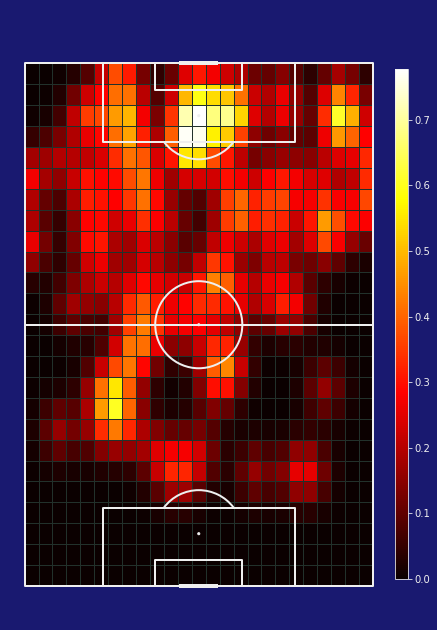

In [84]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='midnightblue', line_color='#efefef')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('midnightblue')

# plot heatmap
bin_statistic = pitch.bin_statistic(vardy_rec.x, vardy_rec.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

# endnote and title
#ax_title = axs['title'].text(0.5, 0.5, "Recuperaciones de Jamie Vardy - Premier League 2015/16", color='white',
 #                            va='center', ha='center',fontsize=23)

## Posición

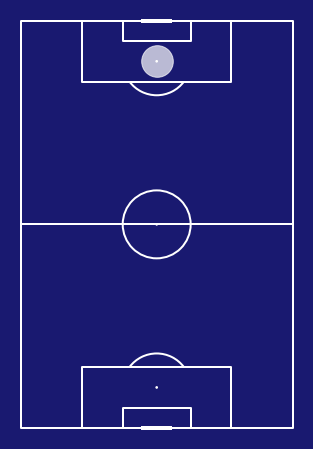

In [85]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='midnightblue', line_color='white',line_zorder=2)
fig, ax = pitch.draw(figsize=(12,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('midnightblue')
pitch.scatter(x = 108, y = 40, ax=ax,c='white',alpha=0.7,s=1000,label='Completada')
plt.show()